# [Go to "Visualisations" in Pandas Docs](https://pandas.pydata.org/docs/user_guide/visualization.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Basic Plotting (Lines)

<AxesSubplot:>

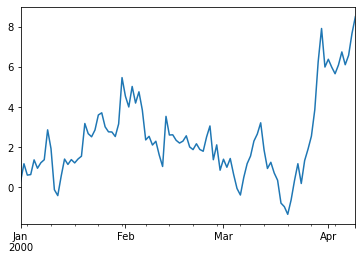

In [2]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100))
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

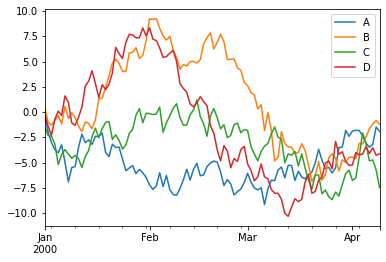

In [3]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

# 2. Bar Plots 

<AxesSubplot:>

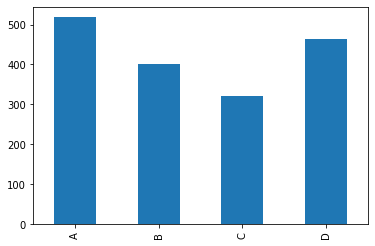

In [4]:
df.abs().sum().plot.bar()

## 2.1 Multiple bar plot (default)

<AxesSubplot:>

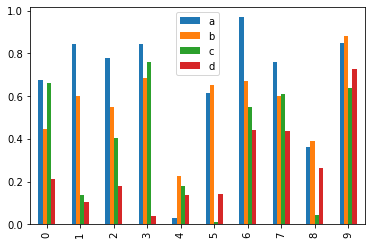

In [5]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=list('abcd'))
df2.plot.bar()

## 2.2 Stacked bar plots

<AxesSubplot:>

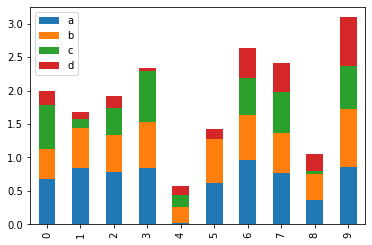

In [6]:
df2.plot.bar(stacked=True)

## 2.3 Horizontal bar plots

<AxesSubplot:>

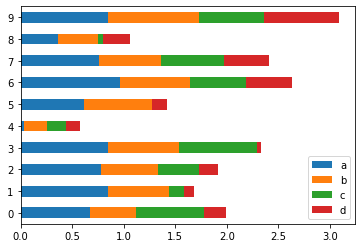

In [7]:
df2.plot.barh(stacked=True)

# 3. Histograms

<AxesSubplot:ylabel='Frequency'>

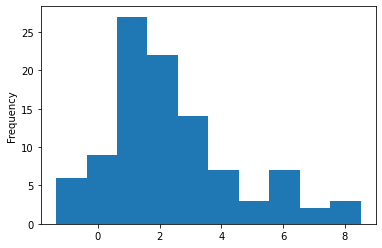

In [8]:
ts.plot.hist()

<AxesSubplot:ylabel='Frequency'>

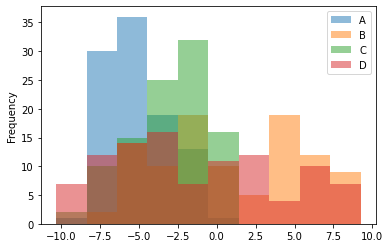

In [9]:
df.plot.hist(alpha=0.5)

## 3.1 Stacked histograms

<AxesSubplot:ylabel='Frequency'>

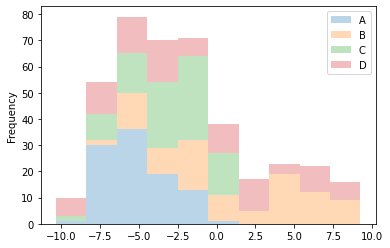

In [10]:
df.plot.hist(stacked=True, alpha=0.3)

## 3.2 Cumulative histograms

<AxesSubplot:ylabel='Frequency'>

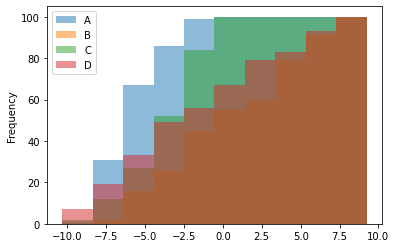

In [11]:
df.plot.hist(cumulative=True, alpha=0.5)

## 3.3 Horizontal histograms

<AxesSubplot:xlabel='Frequency'>

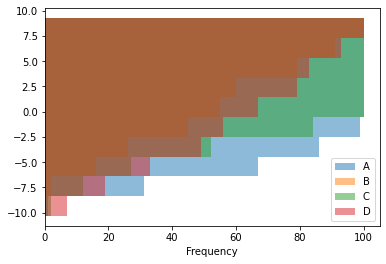

In [12]:
df.plot.hist(cumulative=True, orientation='horizontal', alpha=0.5)

## 3.4 Multiple histogram subplots

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

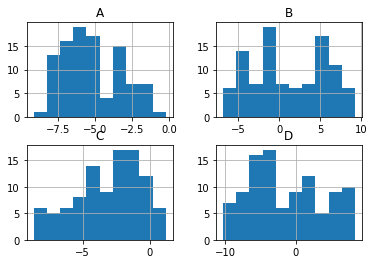

In [13]:
df.hist()

# 4. Box  plots

<AxesSubplot:>

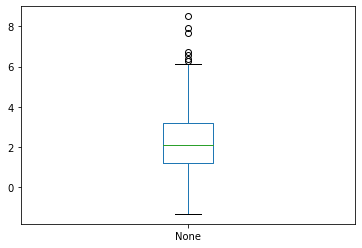

In [14]:
ts.plot.box()

<AxesSubplot:>

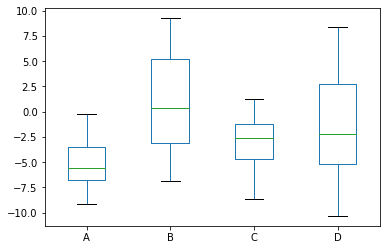

In [15]:
df.plot.box()

<AxesSubplot:>

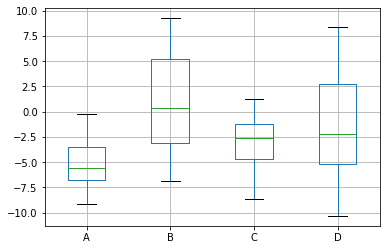

In [16]:
df.boxplot()

## 3.1 Horizontal boxplots

<AxesSubplot:>

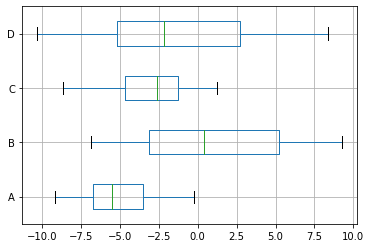

In [17]:
df.boxplot(vert=False)

# 5. Area plots

<AxesSubplot:>

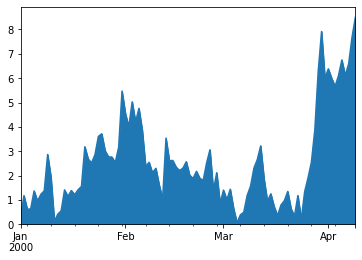

In [18]:
ts.abs().plot.area() # absolute values are used since for stacked area plots
                     # (default), all values must be either +ve or -ve

<AxesSubplot:>

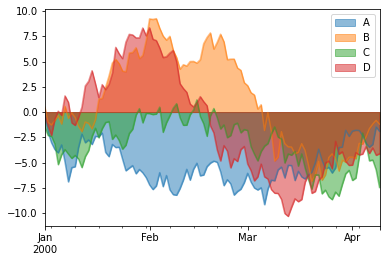

In [19]:
df.plot.area(stacked=False)

# 6. Scatter plots

<AxesSubplot:xlabel='B', ylabel='D'>

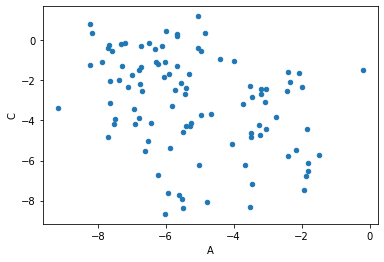

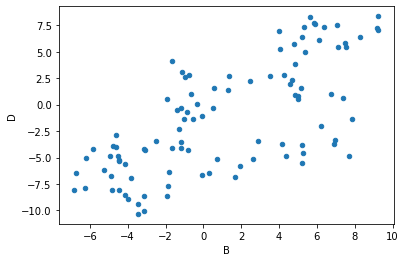

In [20]:
df.plot.scatter(x='A', y='C')
df.plot(x='B', y='D', kind='scatter')

## 6.1 Multiple column groups in same axes

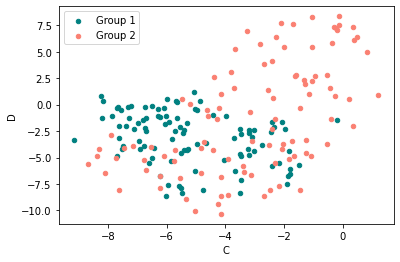

In [21]:
ax = df.plot.scatter(x='A', y='C', color='teal', label='Group 1');
df.plot.scatter(x='C', y='D', color='salmon', label='Group 2', ax=ax);

## 6.2 Color scaling the points using a column

<AxesSubplot:xlabel='A', ylabel='B'>

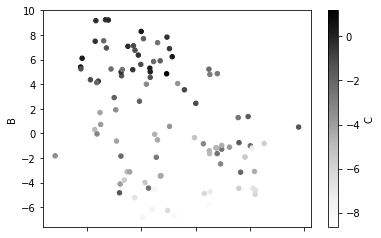

In [22]:
df.plot.scatter(x='A', y='B', c='C')

## 6.3 Setting bubble size

<AxesSubplot:xlabel='A', ylabel='B'>

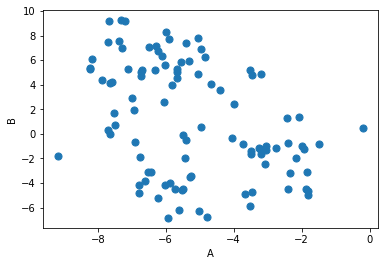

In [23]:
df.plot.scatter(x='A', y='B', s=50)

<AxesSubplot:xlabel='A', ylabel='B'>

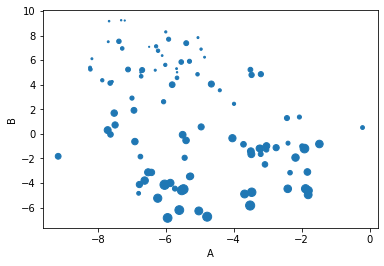

In [24]:
# using column C
df.plot.scatter(x='A', y='B', s=df['C'].abs()*10)

# 7. Hexagonal bin plots

<AxesSubplot:xlabel='A', ylabel='B'>

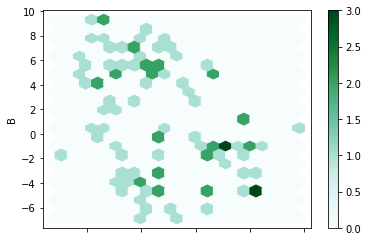

In [25]:
df.plot.hexbin(x='A', y='B', gridsize=20)

## 7.1 Specifying alternate aggregating functions

<AxesSubplot:xlabel='A', ylabel='B'>

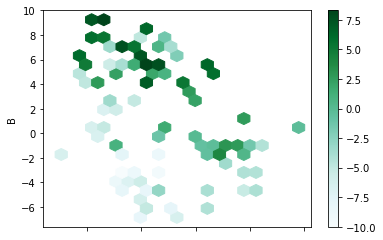

In [26]:
df.plot.hexbin(x='A', y='B', C='D', reduce_C_function=np.max, gridsize=20)
# others include min, sum, mean, ...

# 8. Pie plots

<AxesSubplot:ylabel='Daily Output'>

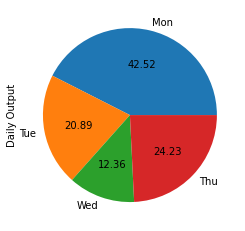

In [27]:
series = pd.Series([344, 169, 100, 196],
                   index=['Mon', 'Tue', 'Wed', 'Thu'], name='Daily Output')
series.plot.pie(autopct='%.2f')

array([<AxesSubplot:ylabel='X'>, <AxesSubplot:ylabel='Y'>], dtype=object)

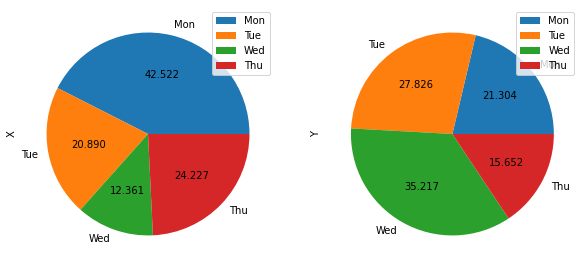

In [28]:
df2 = pd.DataFrame({ 'X': series, 'Y':[49, 64, 81, 36]},
                   index=['Mon', 'Tue', 'Wed', 'Thu'])

df2.plot.pie(subplots=True, figsize=(10, 5), autopct='%.3f')

> ### **Note:** If you pass values whose sum total is less than 1.0, matplotlib draws an incomplete circle.

/home/tim/Projects/learning-pandas/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='X'>, <AxesSubplot:ylabel='Y'>], dtype=object)

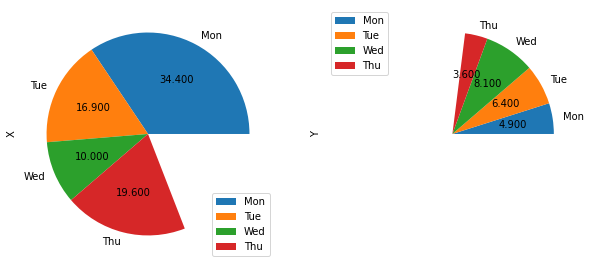

In [29]:
(df2/1000).plot.pie(subplots=True, figsize=(10,5), autopct='%.3f')

# 9. Handling Missing Data
Missing values are dropped, left out, or filled depending on the plot type.

In [30]:
pd.read_html('https://pandas.pydata.org/docs/user_guide/visualization.html')[1]

,Plot Type,NaN Handling
0,Line,Leave gaps at NaNs
1,Line (stacked),Fill 0’s
2,Bar,Fill 0’s
3,Scatter,Drop NaNs
4,Histogram,Drop NaNs (column-wise)
5,Box,Drop NaNs (column-wise)
6,Area,Fill 0’s
7,KDE,Drop NaNs (column-wise)
8,Hexbin,Drop NaNs
9,Pie,Fill 0’s


# 10. Plotting Tools
These functions can be imported from pandas.plotting and take a `Series` or `DataFrame` as an argument.

## 10.1 Scatter matrix

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

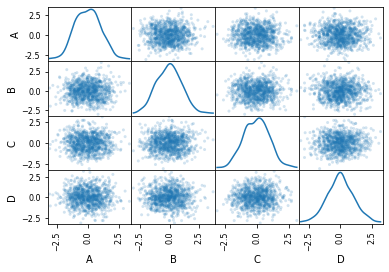

In [31]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])
scatter_matrix(df, alpha=0.2, diagonal='kde')

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

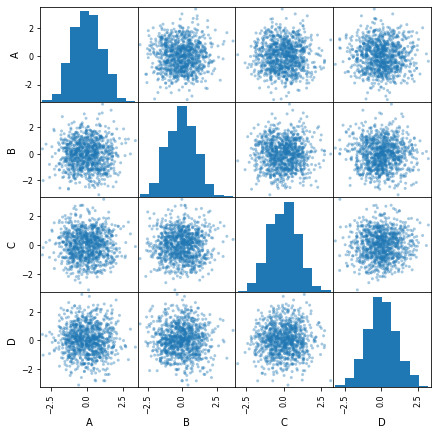

In [32]:
scatter_matrix(df, alpha=0.4, figsize=(7, 7), diagonal='hist')

## 10.2 Density plot

<AxesSubplot:ylabel='Density'>

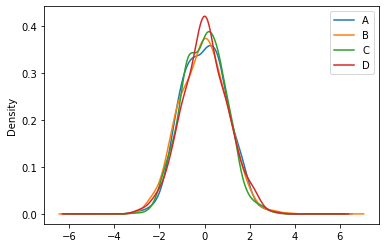

In [33]:
df.plot.kde()

<AxesSubplot:ylabel='Density'>

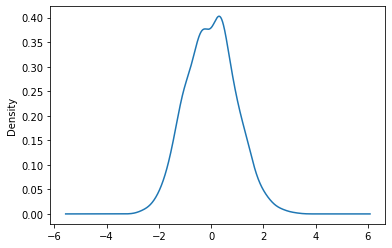

In [34]:
s = pd.Series(np.random.randn(1000))
s.plot.kde()

## 10.3 Andrew curves

In [35]:
from pandas.plotting import andrews_curves

# fetching iris data
columns=['sepal length in cm', 'sepal width in cm', 'petal length in cm',
         'petal width in cm', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
       header=None, names=columns)
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

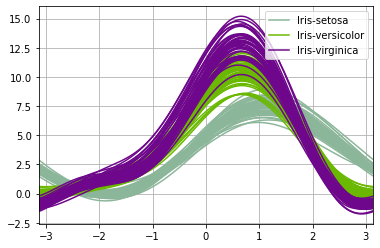

In [36]:
andrews_curves(data, 'class')

## 10.4 Parallel coordinates

<AxesSubplot:>

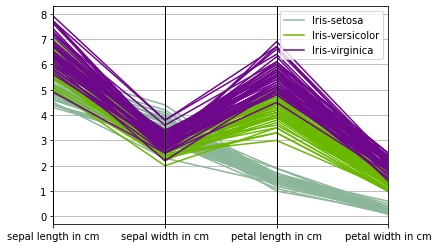

In [37]:
from pandas.plotting import parallel_coordinates

# using the iris data
parallel_coordinates(data, 'class')

## 10.5 Lag plot
Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

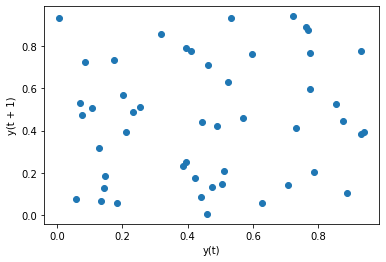

In [38]:
from pandas.plotting import lag_plot

s = pd.Series(np.random.rand(50))
lag_plot(s)

## 10.6 Autocorrelation plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

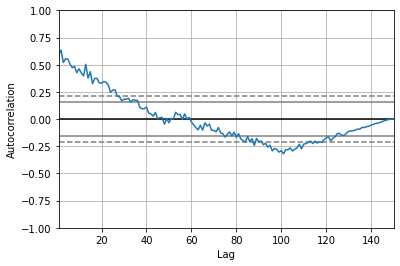

In [39]:
from pandas.plotting import autocorrelation_plot

# using the iris data
s = pd.Series(data['sepal length in cm'])
autocorrelation_plot(s)

## 10.7 Bootstrap plot
The bootstrap plot is used to estimate the uncertainty of a statistic
through random sampling with replacement.

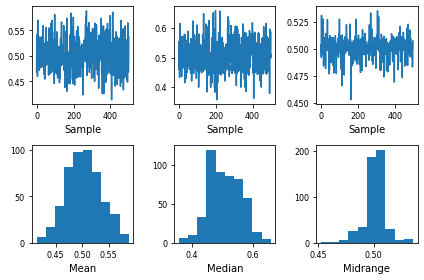

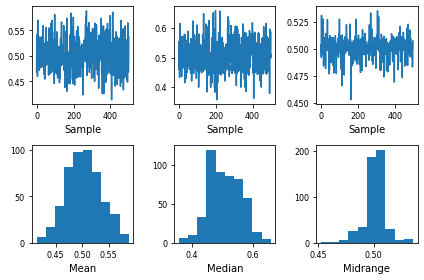

In [40]:
from pandas.plotting import bootstrap_plot

s = pd.Series(np.random.rand(1000))
bootstrap_plot(s, size=75)

## 10.8 RadViz
Plots a multidimensional dataset in 2D. Each `Series` in a `DataFrame` is represented as a evenly distributed slice on a circle, with each data point rendered according to its value. Highly correlated `Series` in the `DataFrame` are placed closer on the unit circle.

<AxesSubplot:>

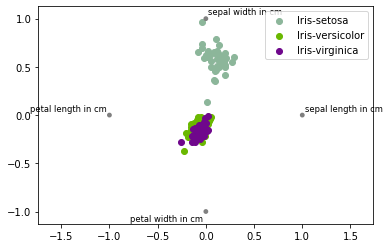

In [41]:
from pandas.plotting import radviz

# using the iris data
radviz(data, 'class')

# 11. Plot Formatting

## 11.1 Setting plot style

In [42]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:>

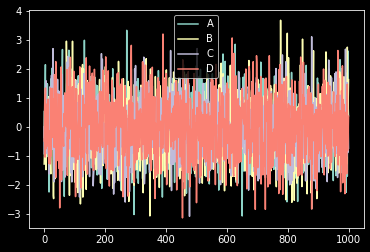

In [43]:
matplotlib.style.use('dark_background')
df.plot()

<AxesSubplot:>

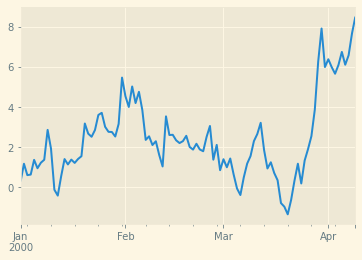

In [44]:
matplotlib.style.use('Solarize_Light2')
ts.plot()

## 11.2 General plot style arguments

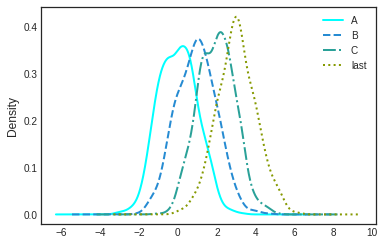

In [45]:
matplotlib.style.use('seaborn-white')
df.A.plot(style='-', kind='kde', color='cyan')  # solid line
# adding numbers to shift the curves to the right, for visibility
(df.B +1).plot(style='--', kind='kde')  # dashed line   
(df.C +2).plot(style='-.', kind='kde')  # dash-dotted line
(df.D +3).plot(style=':', kind='kde', label='last')  # dotted line
plt.legend()

## 11.3 Scales

<AxesSubplot:>

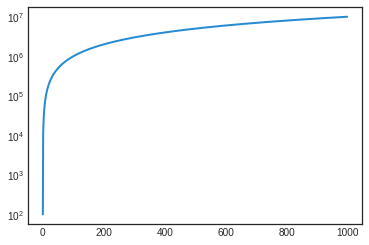

In [46]:
# to get a log scale y-axis
s=pd.Series(range(100, 10**7,10**4))
s.plot(logy=True)

<AxesSubplot:>

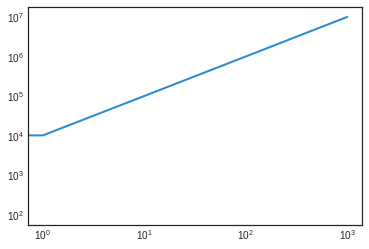

In [47]:
# log scale on both axes
s.plot(logy=True, logx=True)

## 11.4 Subplots

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

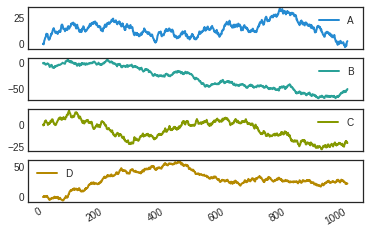

In [48]:
df=df.cumsum()
df.plot(subplots=True)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

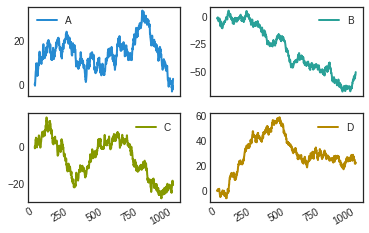

In [49]:
df.plot(subplots=True, layout=(2, 2))

## 11.5 Plotting Tables

<AxesSubplot:>

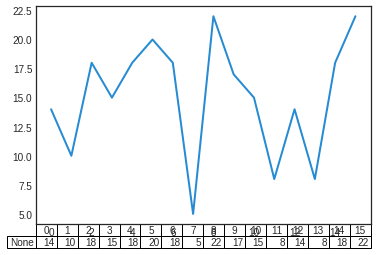

In [50]:
s = pd.Series([14,10,18,15,18,20,18,5,22,17,15,8,14,8,18,22])
s.plot(table=True)

<AxesSubplot:>

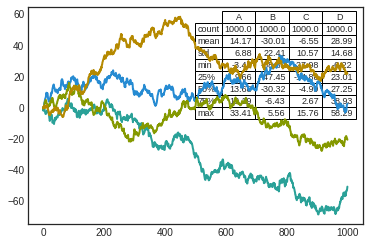

In [51]:
from pandas.plotting import table

# adding a table to axes
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2),
          loc='upper right', colWidths=[0.1, 0.1, 0.1, 0.1])
df.plot(ax=ax, legend=None)

## 11.6 Color Maps

In [52]:
# Matplotlib color maps
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2',
             'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']),            
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

labels = [cmaps[i][0] for i in range(len(cmaps))]
cols = [cmaps[i][1] for i in range(len(cmaps))]
dfc = pd.DataFrame(cols).T.fillna('')
dfc.columns = labels
dfc

,Perceptually Uniform Sequential,Sequential,Sequential (2),Diverging,Cyclic,Qualitative,Miscellaneous
0,viridis,Greys,binary,PiYG,twilight,Pastel1,flag
1,plasma,Purples,gist_yarg,PRGn,twilight_shifted,Pastel2,prism
2,inferno,Blues,gist_gray,BrBG,hsv,Paired,ocean
3,magma,Greens,gray,PuOr,,Accent,gist_earth
4,cividis,Oranges,bone,RdGy,,Dark2,terrain
5,,Reds,pink,RdBu,,Set1,gist_stern
6,,YlOrBr,spring,RdYlBu,,Set2,gnuplot
7,,YlOrRd,summer,RdYlGn,,Set3,gnuplot2
8,,OrRd,autumn,Spectral,,tab10,CMRmap
9,,PuRd,winter,coolwarm,,tab20,cubehelix


<AxesSubplot:>

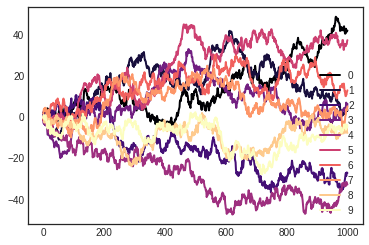

In [53]:
df = pd.DataFrame(np.random.randn(1000, 10)).cumsum()
df.plot(colormap='magma')

<AxesSubplot:>

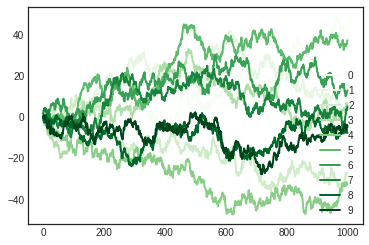

In [54]:
df.plot(colormap='Greens')

<AxesSubplot:>

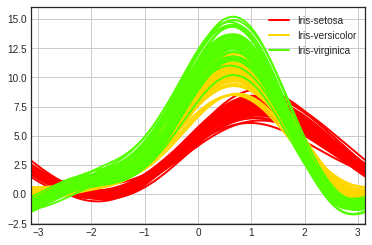

In [55]:
andrews_curves(data, 'class', colormap='prism')